In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D,Dropout
import numpy as np
from skimage import io,transform
import pandas as pd
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
train=pd.read_csv("sign_mnist_train.csv")
test=pd.read_csv("sign_mnist_test.csv")
y_train=train['label'].values
y_test=test['label'].values
X_train=train.drop("label",axis=1)
X_test=test.drop("label",axis=1)

type(X_train)

pandas.core.frame.DataFrame

In [0]:
X_train= np.array(X_train)
X_train=X_train/255
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test= np.array(X_test)
X_test=X_test/ 255
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [5]:

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)
print(X_test.shape)
type(y_train)

(7172, 28, 28, 1)


numpy.ndarray

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


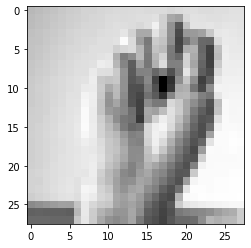

In [6]:
plt.imshow(X_train[4].reshape(28,28),cmap="gray")
print(y_train[4])

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(24, activation = 'softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [8]:
model.fit(X_train,y_train,batch_size=128,epochs=15,validation_split=0.20)


Train on 15761 samples, validate on 3941 samples
Epoch 1/15
15761/15761 [==============================] - 20s 1ms/step - loss: 2.8091 - accuracy: 0.1539 - val_loss: 1.9265 - val_accuracy: 0.4268
Epoch 2/15
15761/15761 [==============================] - 20s 1ms/step - loss: 1.5507 - accuracy: 0.4892 - val_loss: 1.0268 - val_accuracy: 0.6889
Epoch 3/15
15761/15761 [==============================] - 20s 1ms/step - loss: 0.9386 - accuracy: 0.6793 - val_loss: 0.6201 - val_accuracy: 0.8051
Epoch 4/15
15761/15761 [==============================] - 21s 1ms/step - loss: 0.6545 - accuracy: 0.7717 - val_loss: 0.4761 - val_accuracy: 0.8457
Epoch 5/15
15761/15761 [==============================] - 20s 1ms/step - loss: 0.4670 - accuracy: 0.8409 - val_loss: 0.2998 - val_accuracy: 0.9112
Epoch 6/15
15761/15761 [==============================] - 20s 1ms/step - loss: 0.3424 - accuracy: 0.8857 - val_loss: 0.2064 - val_accuracy: 0.9399
Epoch 7/15
15761/15761 [==============================] - 20s 1ms/ste

In [9]:
model.evaluate(X_test,y_test,batch_size=64)

7172/7172 [==============================] - 2s 310us/step


[0.3985204189367555, 0.896681547164917]

In [0]:
model.save("model.h5")